In [44]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pablo\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [45]:
df = pd.read_csv(f'{path}\\WineQT.csv', index_col='Id')

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


explorando o dataset

In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

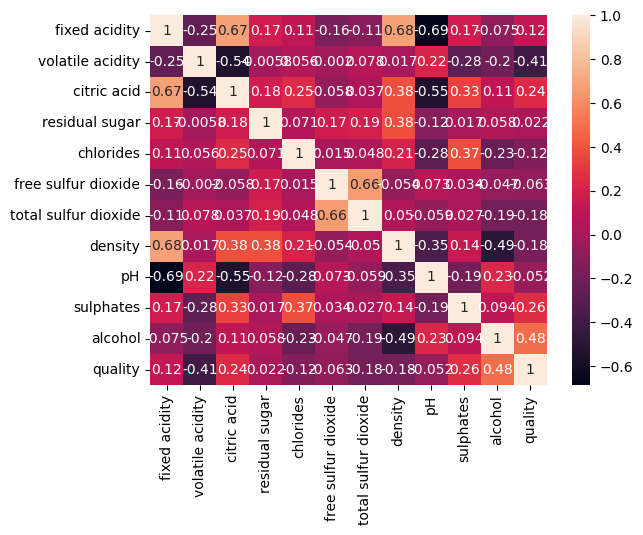

In [49]:
dataplot = sns.heatmap(df.corr(), annot=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


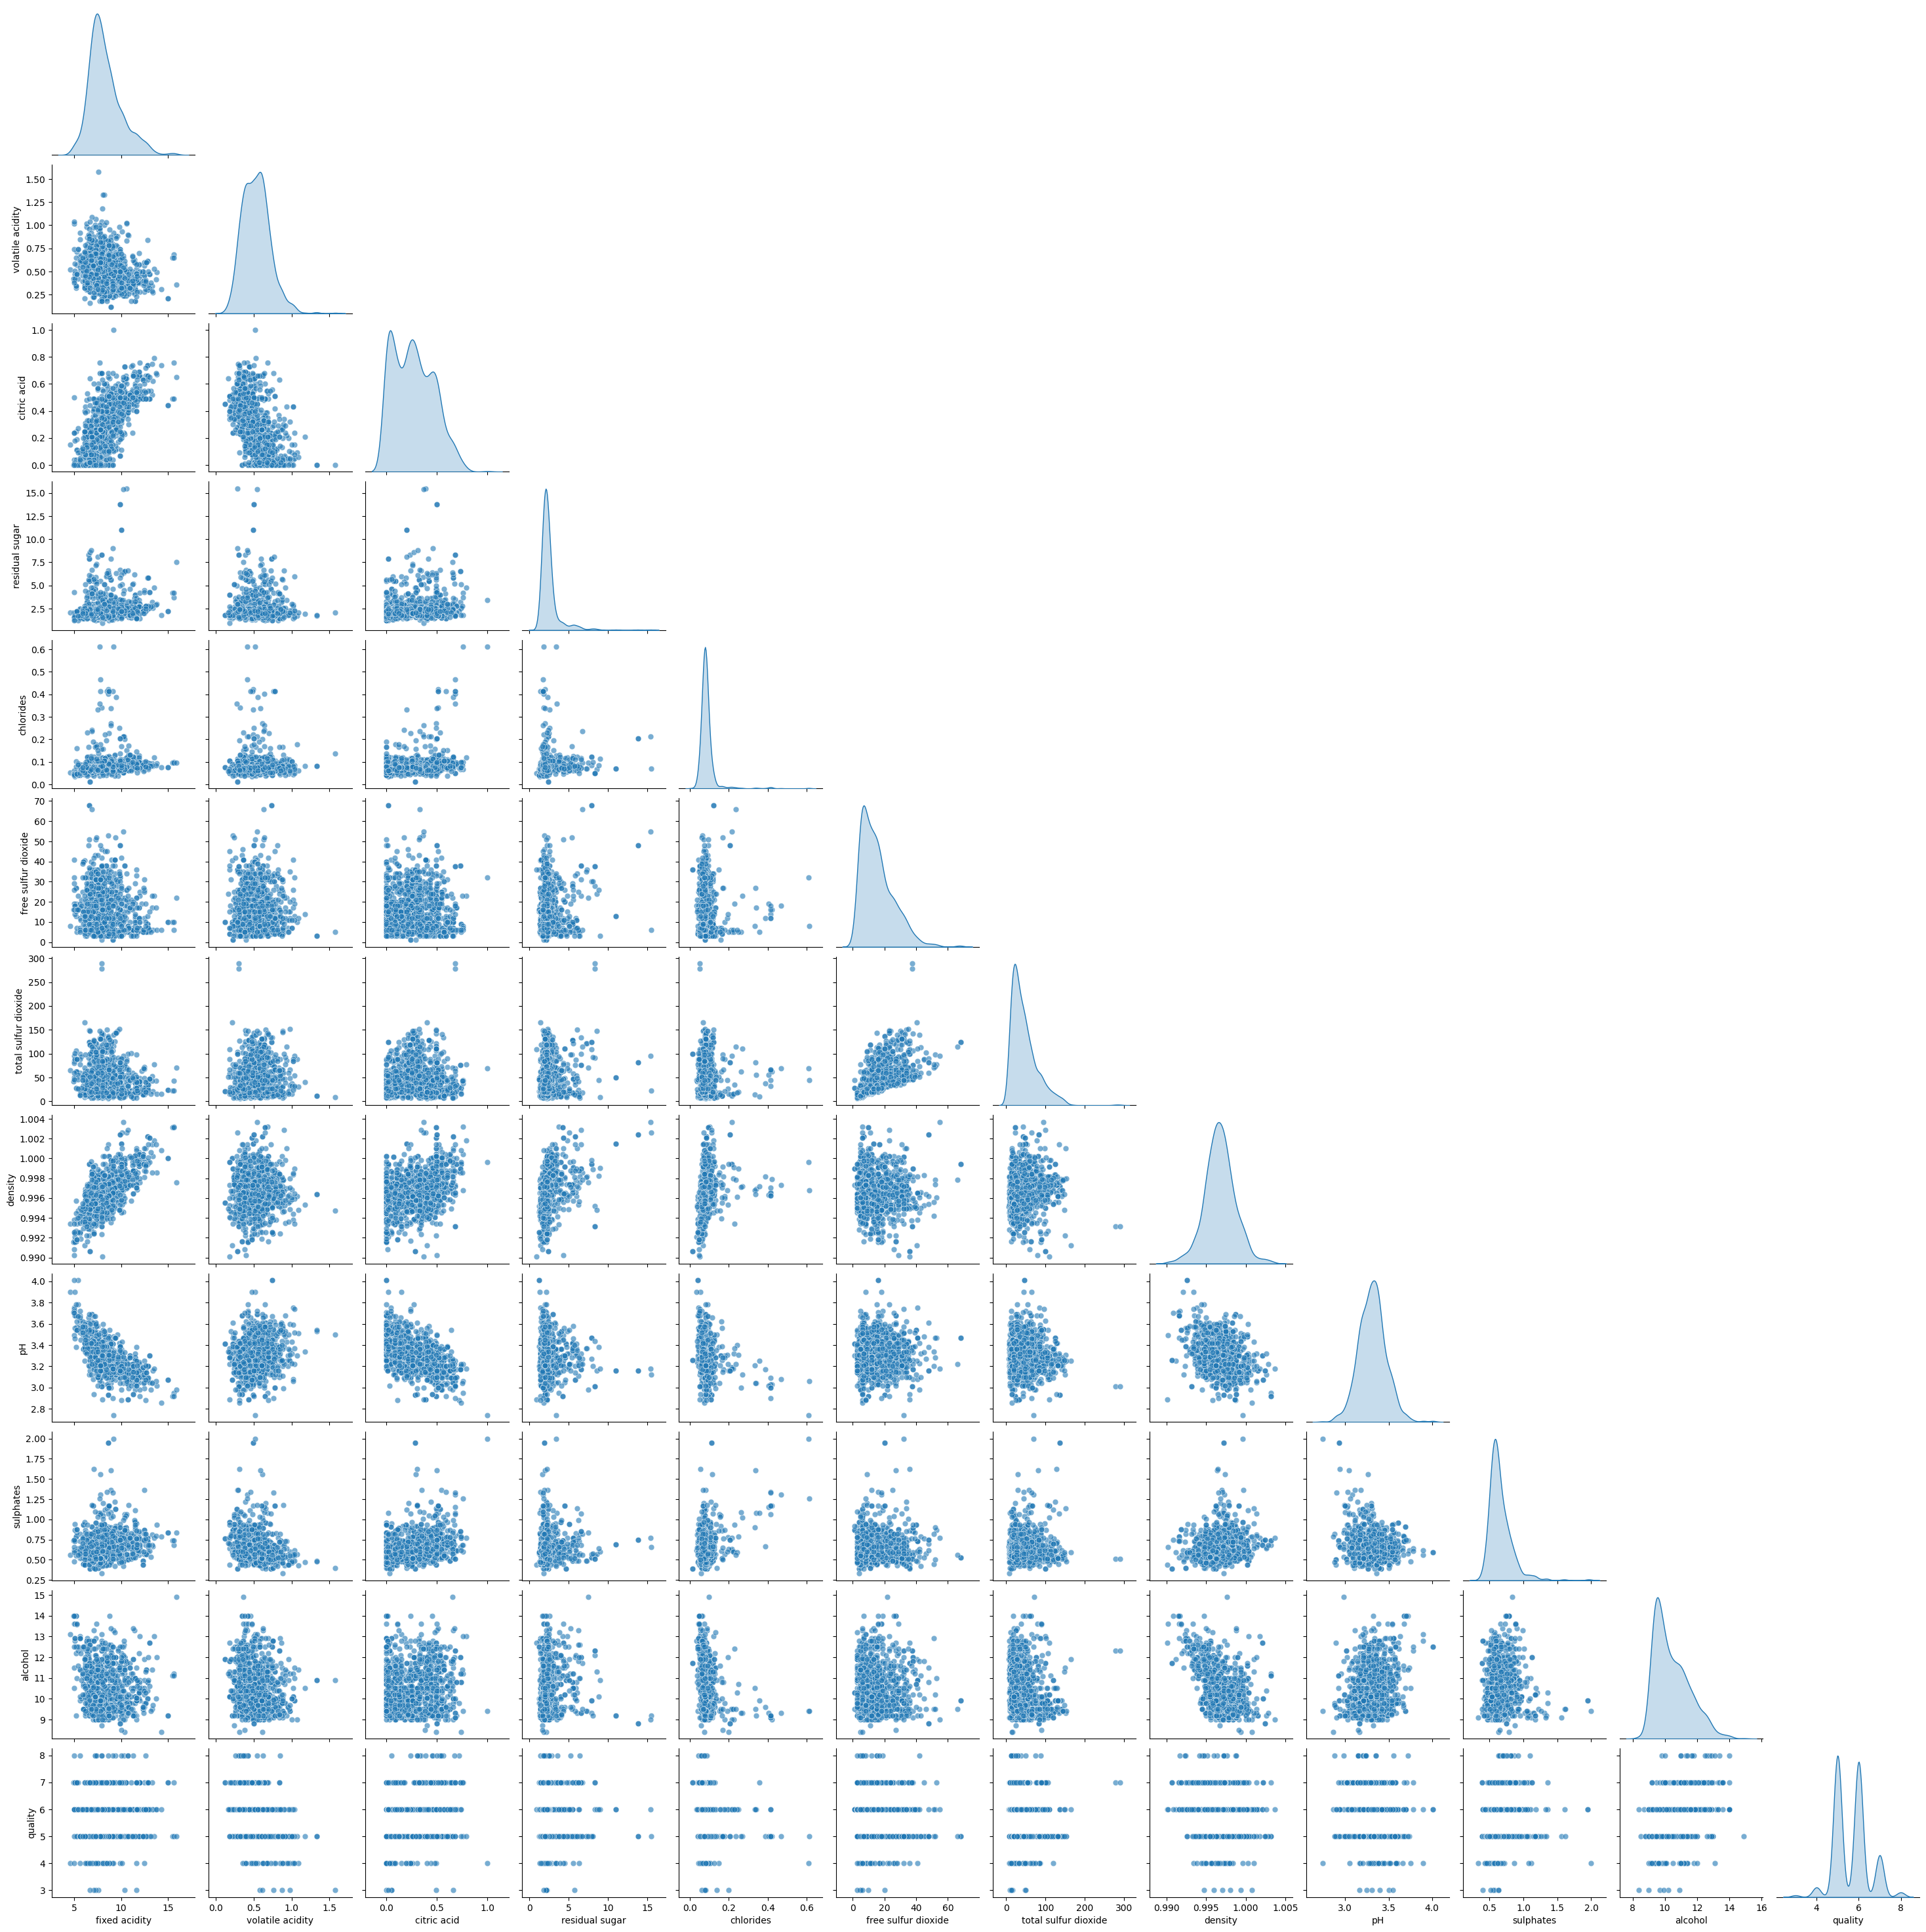

In [51]:
sns.pairplot(df, corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40})


Como nossa variável alvo é uma variável categórica podemos procurar formar melhores de visualizar a influência de outras variáveis na target(alvo)

Uma forma bastante utilizada é o plot jitter que busca separar os pontos de forma que consigamos visualizar melhor os resultados
Referência utilizada: https://stats.stackexchange.com/questions/60856/what-is-the-best-way-to-visualize-relationship-between-discrete-and-continuous-v

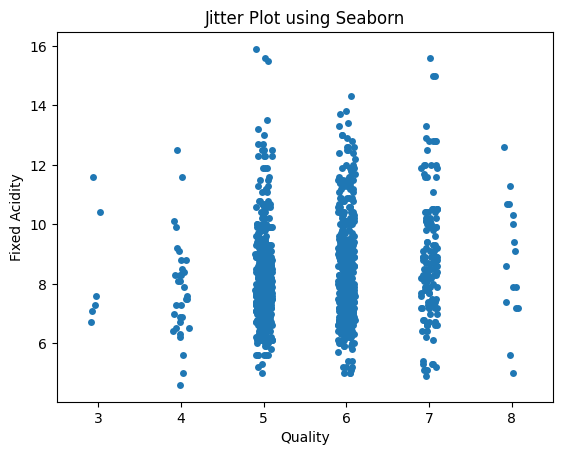

In [52]:
# Criando um jitter plot
sns.stripplot(x="quality", y="fixed acidity", data=df, jitter=True)
plt.title('Jitter Plot using Seaborn')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

Utilizando subplots para visualizar melhor a influência de todas variáveis na variável alvo
Referência utilizada: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

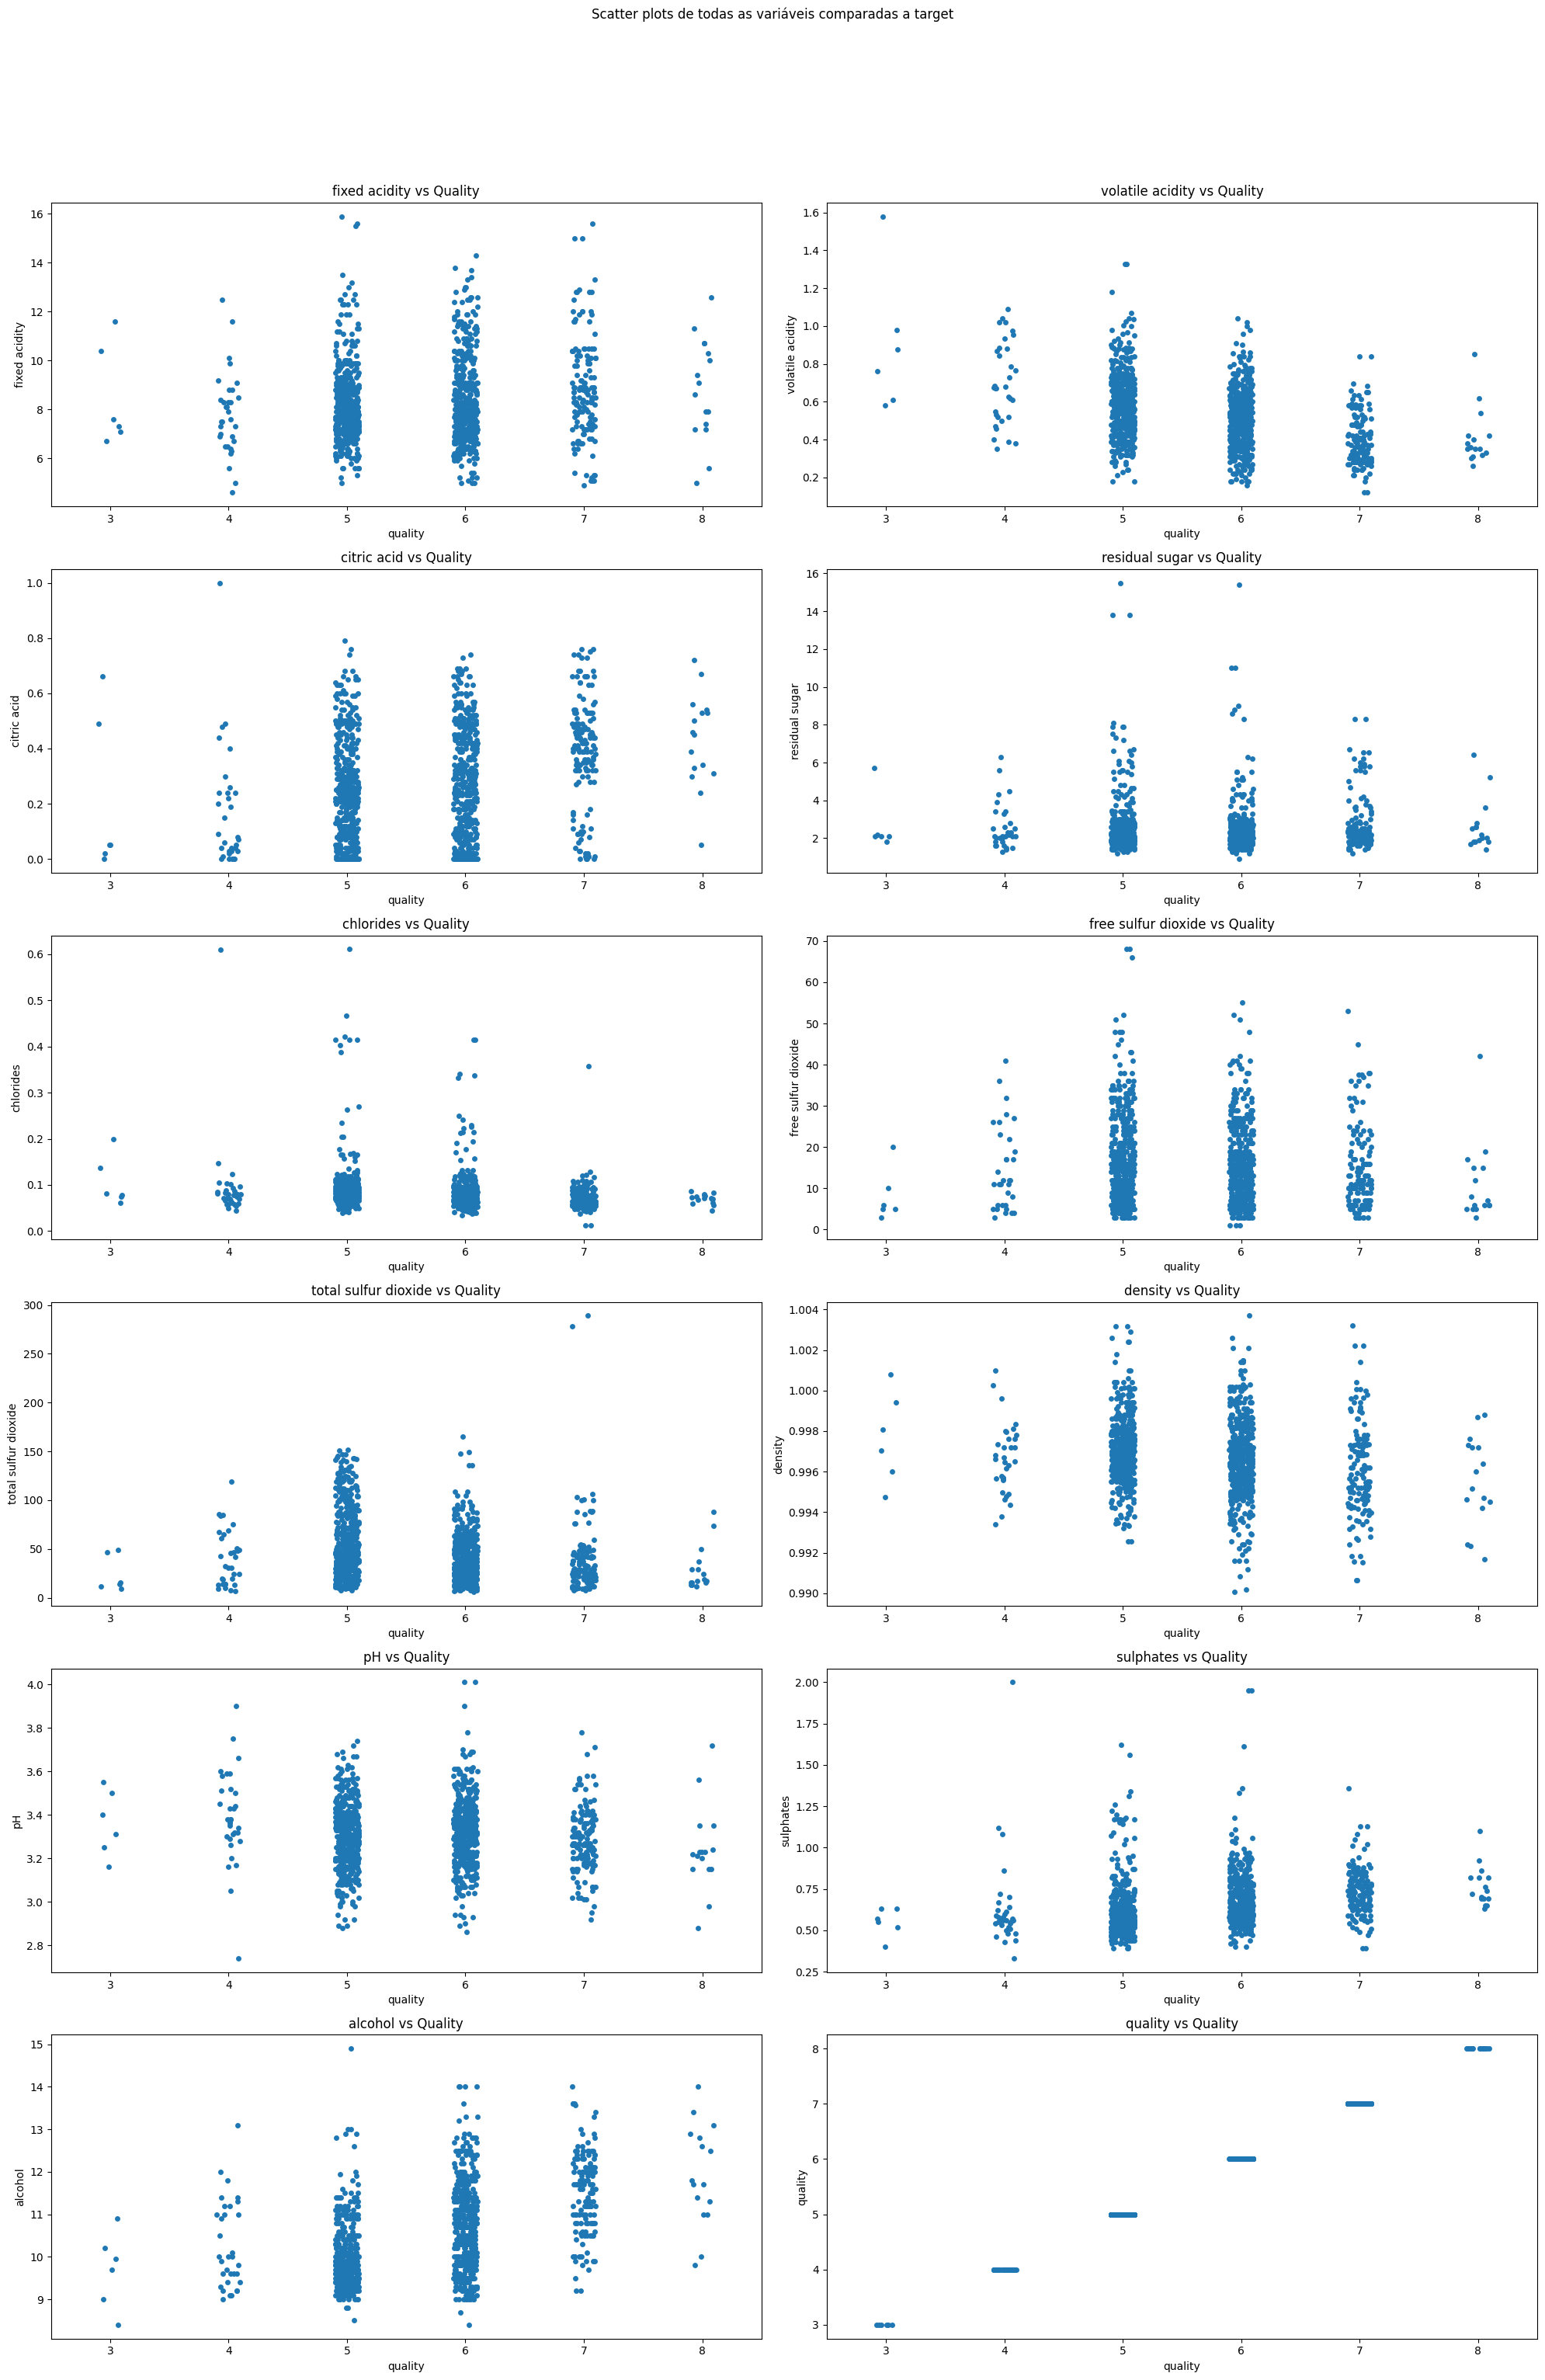

In [53]:
# Obter todas as colunas do DataFrame
columns = df.columns

# Definir o número de linhas e colunas para os subplots
n = len(columns)
ncols = 2
nrows = (n + 1) // ncols  # Calcular o número de linhas necessárias

fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))
fig.suptitle('Scatter plots de todas as variáveis comparadas a target', y=1.02)

# Iterar sobre as colunas e plotar os gráficos
for i, col in enumerate(columns):
    row = i // ncols
    col_pos = i % ncols
    sns.stripplot(x="quality", y=col, data=df, jitter=True, ax=axs[row, col_pos])
    axs[row, col_pos].set_title(f'{col} vs Quality')

# Remover subplots vazios, se houver
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs.flatten()[j])

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

De certa forma conseguimos visualizar que as características por si só sozinhas não são capazes de separar muito bem os resultados obtidos na variável target

Para este projeto utilizaremos o seguinte algoritmo:
- KNN(algoritmo dos vizinhos mais próximos)

In [54]:
# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

Começando pelo KNN

K-Nearest Neighbors Classifier - Matriz de Confusão
[[ 0  0  1  0  0  0]
 [ 0  0  2  5  0  0]
 [ 0  1 66 27  3  0]
 [ 0  1 25 56 10  0]
 [ 0  0  2 17 10  0]
 [ 0  0  1  1  1  0]]


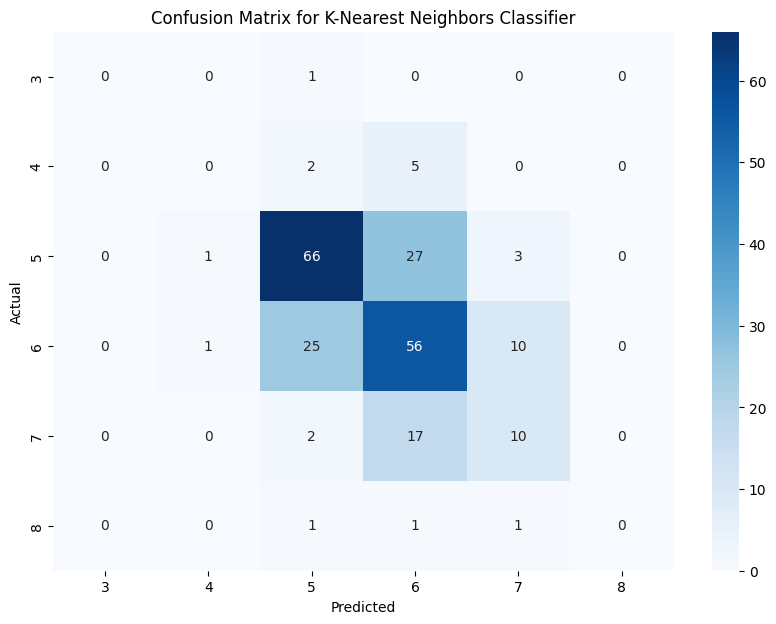

In [55]:
# Carregar o dataset
df = pd.read_csv(f'{path}\\\\WineQT.csv', index_col='Id')

# Separar as features e a variável alvo
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Definir todas as classes presentes no dataset
classes = sorted(y.unique())

# Matriz de Confusão
print("K-Nearest Neighbors Classifier - Matriz de Confusão")
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels=classes)
print(conf_matrix)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

Acima conseguimos visualizar onde estão as previsões do modelo comparado com os valores reais, mas como temos muito dados devemos encontrar uma forma de sumarizar melhor os dados para melhorarmos a compreensão e entendimento

In [56]:
import warnings
warnings.filterwarnings('ignore')

# Relatório de Classificação
print("\nK-Nearest Neighbors Classifier - Relatório de Classificação")
class_report = classification_report(y_test, y_pred_knn, labels=classes, target_names=[str(i) for i in classes])
print(class_report)


K-Nearest Neighbors Classifier - Relatório de Classificação
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.68      0.68      0.68        97
           6       0.53      0.61      0.57        92
           7       0.42      0.34      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.58       229
   macro avg       0.27      0.27      0.27       229
weighted avg       0.55      0.58      0.56       229



É possível se visualizar que as previsões se concentram mais nas classes que temos mais amostras, pois assim teremos mais vizinhos próximos com aquelas amostras para tentar corrigir este erro e prever melhor as classes que temos menos amostras podemos tentar alterar a quantidade de vizinhos

Antes de tentarmos melhorar nosso modelo devemos registrar as métricas gerais que obtivemos inicialmente

In [57]:
# Calculando métricas importantes para o modelo
print(f'Acurácia do Modelo: {accuracy_score(y_test, y_pred_knn)}\n')
print(f'Recall: {recall_score(y_test, y_pred_knn, average="weighted")}\n')
print(f'Precisão: {precision_score(y_test, y_pred_knn, average="weighted")}\n')
print(f'F1 Score: {f1_score(y_test, y_pred_knn, average="weighted")}\n')

Acurácia do Modelo: 0.5764192139737991

Recall: 0.5764192139737991

Precisão: 0.553218807503227

F1 Score: 0.5632480360996469



Agora com intenção de melhorarmos nosso modelo podemos alterar a quantidade de vizinhos e os parâmetros de peso e métrica de distância e visualizar como os resultados são afetados

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir os parâmetros para o GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instanciar o classificador
knn = KNeighborsClassifier()

# Instanciar o GridSearchCV usando apenas a métrica de acurácia
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print()

# Prever com o melhor modelo encontrado
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calcular e exibir as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Melhores parâmetros encontrados:
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

Acurácia: 0.6725
Precisão: 0.6390
Recall: 0.6725
F1 Score: 0.6534


Podemos ver que o desempenho num geral aumentou bastante em todas as métricas, utilizando pesos para os vizinhos baseado na distância, 9 vizinhos e a distância euclidiana(que já estava sendo utilizada no caso)

In [59]:
# Retirando o máximo de linhas e colunas a serem exibidas
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [60]:
# Fazer um gráfico com os resultados do GridSearchCV  
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004277,0.000776,0.023060,0.001785,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",0.535519,0.486339,0.480874,0.486339,0.521978,0.502210,0.022178,16,0.752394,0.744186,0.749658,0.746922,0.743169,0.747266,0.003418
1,0.004119,0.001969,0.008015,0.001632,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}",0.590164,0.562842,0.557377,0.540984,0.565934,0.563460,0.015886,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.003366,0.000622,0.021078,0.001776,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",0.562842,0.535519,0.508197,0.513661,0.538462,0.531736,0.019534,15,0.686731,0.688098,0.681259,0.678523,0.683060,0.683534,0.003509
3,0.003413,0.001055,0.006799,0.000703,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}",0.622951,0.595628,0.584699,0.562842,0.598901,0.593004,0.019582,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.003107,0.000601,0.019900,0.001048,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",0.568306,0.557377,0.557377,0.524590,0.527473,0.547025,0.017623,10,0.659371,0.663475,0.660739,0.655267,0.648907,0.657552,0.005069


Transformando o retorno do GridSearch em gráficos para melhor visualização

['euclidean' 'manhattan']


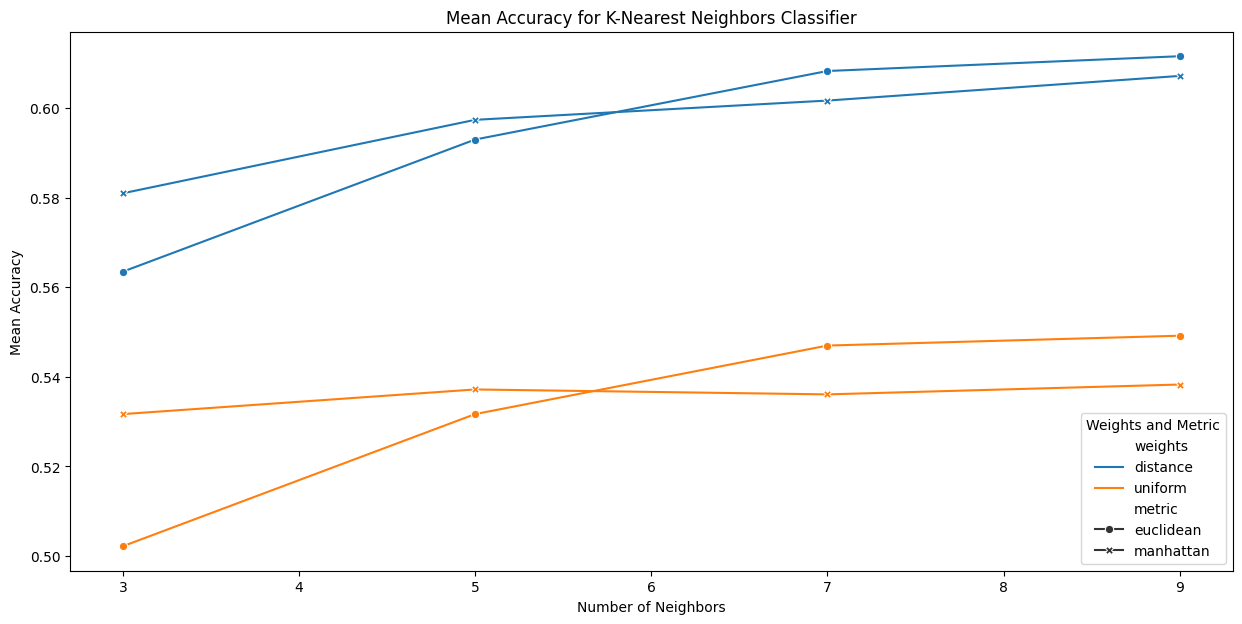

In [61]:
# Fazer um gráfico com os resultados do GridSearchCV  
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')
results = results[['param_n_neighbors', 'param_weights', 'param_metric', 'mean_test_score']]
results = results.rename(columns={
    'param_n_neighbors': 'n_neighbors',
    'param_weights': 'weights',
    'param_metric': 'metric',
    'mean_test_score': 'mean_accuracy'
})
results['n_neighbors'] = results['n_neighbors'].astype(int)
results['weights'] = results['weights'].astype(str)
results['metric'] = results['metric'].astype(str)
results['mean_accuracy'] = results['mean_accuracy'].round(4)

# Verificar se todos os parâmetros estão presentes
print(results['metric'].unique())

# Plotar gráficos de linha para a métrica de acurácia
plt.figure(figsize=(15, 7))
sns.lineplot(data=results, x='n_neighbors', y='mean_accuracy', hue='weights', style='metric', markers=True, dashes=False)
plt.title('Mean Accuracy for K-Nearest Neighbors Classifier')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')
plt.legend(title='Weights and Metric')
plt.show()